# Heatmap cooperation

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools as it
sns.set()
sns.set_palette('colorblind')

In [79]:
conds1 = ['small', 'big', 'huge']
conds2 = [100, 500, 1000, 5000]
gen = 9999

In [80]:
out = []
for cond1, cond2 in it.product(conds1, conds2):
    mainpath = f'/data/logs/decay-{cond2}-2018-07-17-1404/{cond1}_env_decay_{cond2}/'
    for run in range(1, 6):
        logfile = f'{mainpath}/run_{run}/rep{{:02}}/logall_{gen}.txt'
        i = 0
        ok = True
        to_format = '{' in logfile
        logs = []
        while ok:
            try:
                try:
                    dat = pd.read_csv(logfile.format(i), delimiter="\t")
                except:
                    dat = pd.read_csv(logfile.format(i) + '.gz', delimiter="\t")
                        
                dat["eval"] = i
                logs.append(dat)
            except:
                ok = False
            else:
                i += 1
                ok = to_format
        log = pd.concat(logs).query('fake == 0') # Fakes are removed from data
        on_opp = log.query('onOpp == 1 and nbOnOpp == 2')
        mean_inv = on_opp['curCoop'].mean()
        out.append({'size': cond1, 'time': cond2, 'run': run, 'meanInv': mean_inv})
        

In [81]:
outdf = pd.DataFrame(out)
outdf['size'] = pd.Categorical(outdf['size'], categories=['small', 'big', 'huge'], ordered=True)
outdf

,meanInv,run,size,time
0,3.398990,1,small,100
1,2.311442,2,small,100
2,3.020754,3,small,100
3,2.249609,4,small,100
4,3.506330,5,small,100
5,1.650620,1,small,500
6,3.300712,2,small,500
7,3.460804,3,small,500
8,2.739499,4,small,500
9,3.438836,5,small,500


In [86]:
m = outdf.groupby(['size', 'time'], as_index=False).mean()

In [87]:
f = m.pivot('size', 'time', 'meanInv')

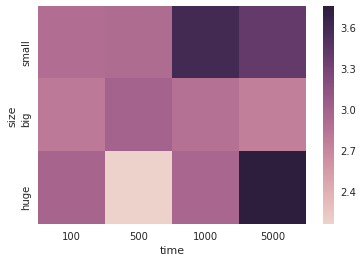

In [92]:
sns.heatmap(f, cmap=sns.cubehelix_palette(100))

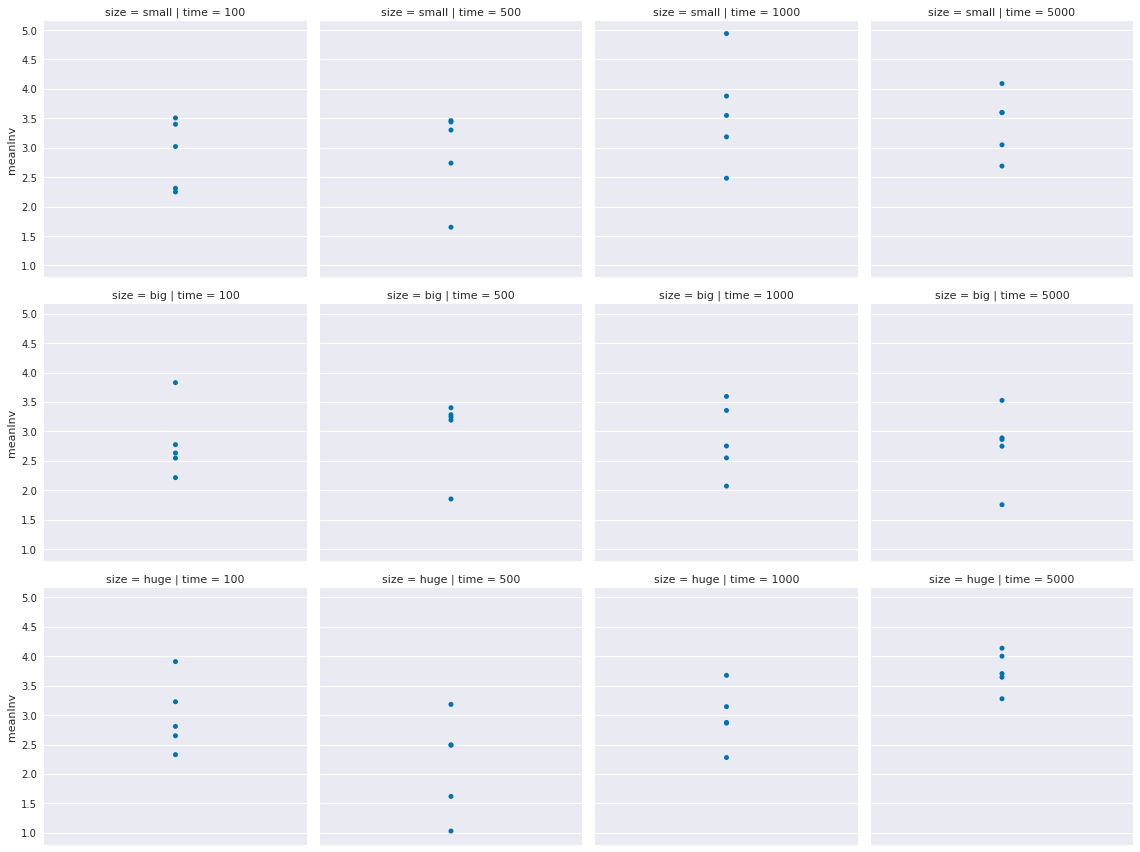

In [110]:
sns.factorplot(data=outdf, col='time', row='size', y='meanInv', kind='strip', sharey=True)